In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from src.data.toy_data import *
from src.model.boosted_support_subset import *
from src.visualization.plots import *
from src.utils import *

# Overlapping bivariate normals

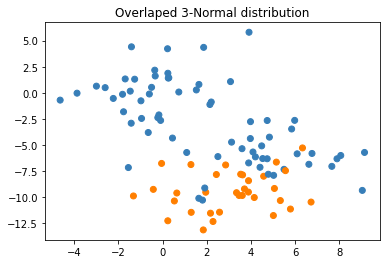

In [3]:
X, y = normal(n=100, prop_test=0.1, noise=2, centers=3, seed=156899)
plot_toy_set(X, y, 'Overlaped 3-Normal distribution')

## Random forest

In [4]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', criterion='gini',random_state=1324)

In [5]:
preds = StratifiedKFoldTestPredictions(X, y, rf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.58,0.06,0.64
1,0.09,0.27,0.36
total,0.67,0.33,1.00


In [6]:
rf.fit(X, y)

RandomForestClassifier(random_state=1324)

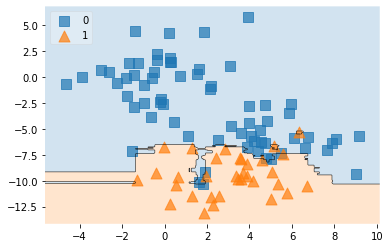

In [7]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, rf, title='')

## SVM

In [8]:
svm = SVC(C=1, gamma = 0.1)

In [9]:
preds = StratifiedKFoldTestPredictions(X, y, svm)
confusion_matrix(svm.predict(X), y)

real,0,1,total
pred,,,
0,0.62,0.03,0.65
1,0.05,0.30,0.35
total,0.67,0.33,1.00


In [10]:
svm.fit(X, y)

SVC(C=1, gamma=0.1)

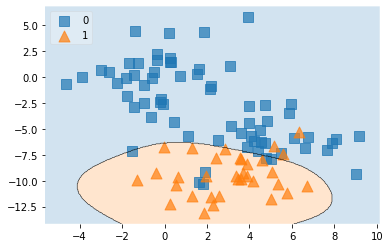

In [11]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, svm, title='')

## BSS

In [81]:
clf = BoostedSupportSubset(sample_size=15, n_learners=10)

In [82]:
clf.fit(X, y)

[10]
[5, 9]
[13 14  8 12]
[10  5  9 13 14  8 12]
[3, 6, 14]
[4, 7, 10]
[ 0  9  5  8 13]
[ 3  6 14  4  7 10  0  9  5  8 13]
[5, 6, 10]
[1, 9, 13]
[ 0  3 14  2  8 12]
[ 5  6 10  1  9 13  0  3 14  2  8 12]
[3, 9]
[2, 12]
[11 13 14  5 10]
[ 3  9  2 12 11 13 14  5 10]
[0]
[11]
[ 4 14  9]
[ 0 11  4 14  9]
[6, 8]
[10, 11]
[ 7  9  3 14]
[ 6  8 10 11  7  9  3 14]


In [83]:
clf.learners

[{'data': {'train_indexes': array([40, 35, 81, 61, 98, 68, 85, 27, 39, 42, 33, 59, 63, 94, 56]),
   'support_subset_indexes': array([33, 68, 42, 94, 56, 39, 63]),
   'active_indexes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
          34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
          51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
          68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
          85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
   'excluded_indexes': array([], dtype=float64)},
  'learner': SVC(C=1, kernel='linear', random_state=1234)},
 {'data': {'train_indexes': array([96, 61, 98, 13, 46,  0, 65, 51, 32, 62, 38,  9, 59, 74,  8]),
   'support_subset_indexes': array([13, 65,  8, 46, 51, 38, 96, 62,  0, 32, 74]),
   'active_indexes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 

In [84]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

[10]
[0, 1, 2]
[ 5 14  8 12 13]
[10  0  1  2  5 14  8 12 13]
[3]
[11]
[0 9 8]
[ 3 11  0  9  8]
[0, 9]
[1, 2, 6, 8]
[ 3  4 12 14  5  7 11 13]
[ 0  9  1  2  6  8  3  4 12 14  5  7 11 13]
[7, 12]
[0, 3, 6, 11]
[ 5  8 10 14  1  4  9 13]
[ 7 12  0  3  6 11  5  8 10 14  1  4  9 13]
[7]
[6]
[10 13  5]
[ 7  6 10 13  5]
[10]
[0, 1]
[ 5 14  8 12]
[10  0  1  5 14  8 12]
[2]
[9]
[ 4 11  0]
[ 2  9  4 11  0]
[4, 6, 10]
[1, 2, 8]
[ 0  7 11 14  5  9 12]
[ 4  6 10  1  2  8  0  7 11 14  5  9 12]
[10]
[0, 4]
[ 1  5 14 12 13]
[10  0  4  1  5 14 12 13]
[4]
[3]
[0 9 8]
[4 3 0 9 8]
[]
[1, 3, 13]
[ 0  7 10 14  5  6 12]
[ 1  3 13  0  7 10 14  5  6 12]
[11]
[0]
[3 8 7]
[11  0  3  8  7]
[0, 13]
[2, 10]
[ 1  4  9 12]
[ 0 13  2 10  1  4  9 12]
[6, 12]
[1, 4]
[ 2 10 14  3  8]
[ 6 12  1  4  2 10 14  3  8]
[1]
[2]
[ 3 12 13]
[ 1  2  3 12 13]
[13]
[6]
[1 8]
[13  6  1  8]
[10, 13]
[0, 4]
[ 1  2  5 12 14]
[10 13  0  4  1  2  5 12 14]
[3, 10]
[8, 11]
[ 0  9 13 14]
[ 3 10  8 11  0  9 13 14]
[3, 10]
[0, 5, 12]
[ 1  6  9 14

StatisticsError: no mode for empty data

In [76]:
pepe = []
paco = [1, 3, 13]
patata = [ 0,  7, 10, 14,  5,  6, 12]

In [77]:
len(pepe)

0

In [80]:
np.hstack([i for i in [pepe, paco, patata] if len(i) > 0])

array([ 1,  3, 13,  0,  7, 10, 14,  5,  6, 12])

In [73]:
pepe = np.array([ 1.,  3., 13.,  0.,  7., 10., 14.,  5.,  6., 12.])

In [75]:
pepe.astype(int)

array([ 1,  3, 13,  0,  7, 10, 14,  5,  6, 12])

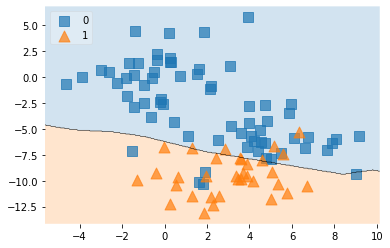

In [32]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

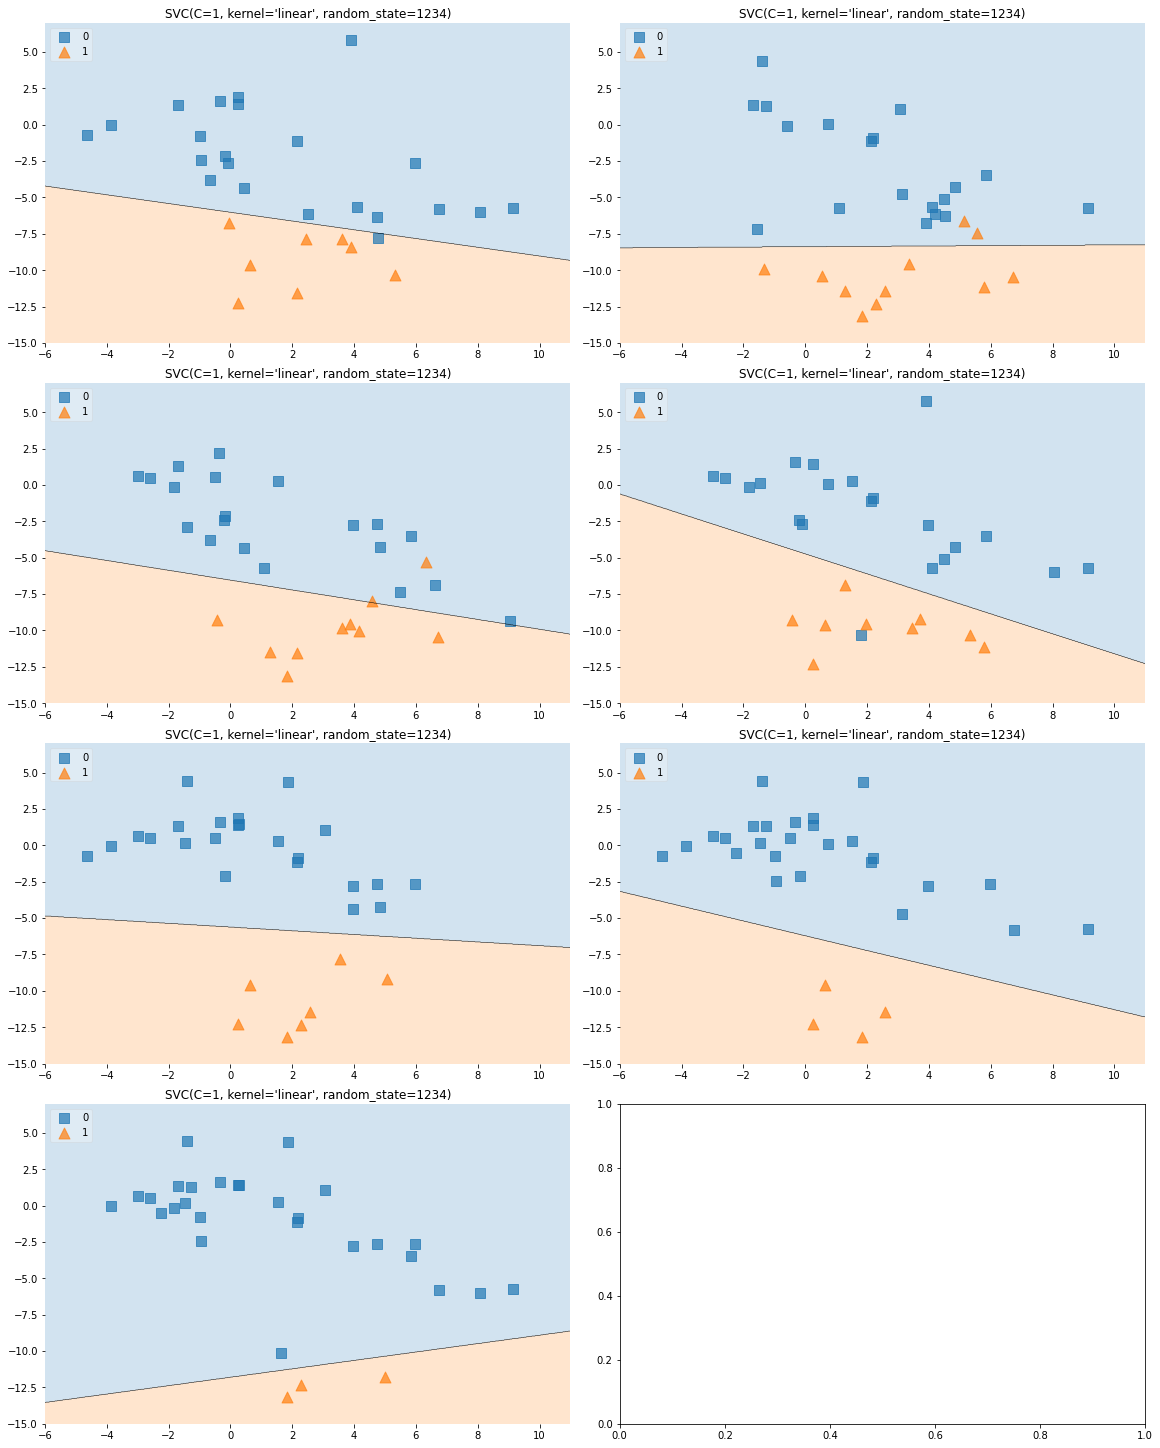

In [33]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners, zoom=0.1)